
## Ocean Colour Remote Sensing and Data Analysis Course for Early Career Ocean Professionals in Africa  

#### Lesson 2
<span style="color:brown; font-size:1.2em;font-style:italic">  -	Introduction to satellite data search and download methods </span>
<hr style="border:2px solid rgb(30,70,125)"> </hr>


<span style="font-family:Helvieta; font-size:1em;">Eligio Maure (maure@npec.or.jp)</span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button.   
Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Search and retrieve images from G-Portal](#3.-Search-and-retrieve-images-from-G-Portal)
- [4. Exercise with SGLI/GCOM-C ](#4.-Exercise-with-SGLI/GCOM-C)
- [5. Resources](#5.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

This exercise is preceeded by a lecture about [Access to Open Ocean Colour Data](https://classroom.oceanteacher.org/mod/book/view.php?id=18971&forceview=1#:~:text=Access%20to%20Open%20Ocean%20Colour%20Data) where detailed introduction is given on how to search and retrieve data from open data archives active centres (DAACs). 

Here, your will have the change to play with a Python code that retrieves Level 2 Ocean Color SGLI/GCOM-C data from JAXA's [G-Portal](https://gportal.jaxa.jp/gpr/) site.

As for tha data obtained from the NASA's [OceanColorWeb](https://oceancolor.gsfc.nasa.gov/), the website offers an easy way to place orders and download bulk data. 

***

# 2. Library import   
[Return to the "Table of contents"](#Table-of-contents)

Start by importing require modules for this activity   
If a module throws a `ModuleNotFoundError` try installing it with the command  
- `!conda install --channel "conda-forge" module` or with  
- `!pip install module`  

If you have a requirement file containing the names of the modules you want to install, use
- `!pip install -r requirements.txt`

Remove `!` if you run the command directly in your terminal or command prompt

In [1]:
# importing module
from datetime import datetime

import pandas as pd
import h5py 

- **Local modules**  
Include a local library (scripts) with custom fuctions.  

We use the `sys` module to append a directory to the list of known paths for interpreter to search.  
This allow us to import the custom functions or modules not in the search directories.

We also use the `Path` library to help us get the name of the current working directory.

In [2]:
# importing module
import sys
from pathlib import Path
  
# appending a path
cwd = Path.cwd()
sys.path.append(str(cwd.parent))

# print(cwd.parent)

In [3]:
import octutils as util

# 3. Search and retrieve images from G-Portal
[Return to the "Table of contents"](#Table-of-contents)

Inside `util` there is a function named `getfile`.  

Use `help` to get information on how to use the function

In [4]:
help(util.getfile)

Help on function getfile in module octutils:

getfile(bbox, start_date, end_date, output_dir=None, sensor='sgli', dtype='OC')
    :param bbox: bounding box (area of interest) e.g., (lon_min, lat_min, lon_max, lat_max)
                 Mozambique channel bbox (30, -30, 50, -10)
    :type bbox: tuple
    :param start_date: data search start date
    :type start_date: datetime
    :param end_date: data search end date
    :type end_date: datetime
    :param sensor: sensor name, currently only SGLI is support.
                   For NASA's supported sensor is easy to use the OceanColor Web to place data orders.
    :param output_dir: if output path is not specified, the current working directory is used.
                       A folder with the sensor name and `L2` appended is created and data is saved therein
    :type output_dir: Path
    :type sensor: str
    :param dtype: data type, OC - ocean colour or SST - sea surface temperature
    :type dtype: str
    :return: list of images with

In [5]:
# Define data retrieve params
start = datetime(2022, 5, 25)
end = start
bbox = 30, -30, 50, -10
sensor = 'sgli'
dtype = 'OC'

files = util.getfile(start_date=start, 
                     end_date=end, 
                     bbox=bbox, 
                     sensor=sensor, 
                     dtype=dtype)
print(f'Path: {files[0].parent}')
print('\n'.join(f.name for f in files))

Path: C:\Users\Eligio\Documents\My-Res\OceanDecade\ocean-colour-training-ecops-africa\Day2\SGLI_L2
GC1SG1_202205250725U16613_L2SG_IWPRQ_3000.h5
GC1SG1_202205250730D16614_L2SG_IWPRQ_3000.h5
GC1SG1_202205250734H16615_L2SG_IWPRQ_3000.h5


- **SGLI/GCOM-C level-2 visualize downloaded data**

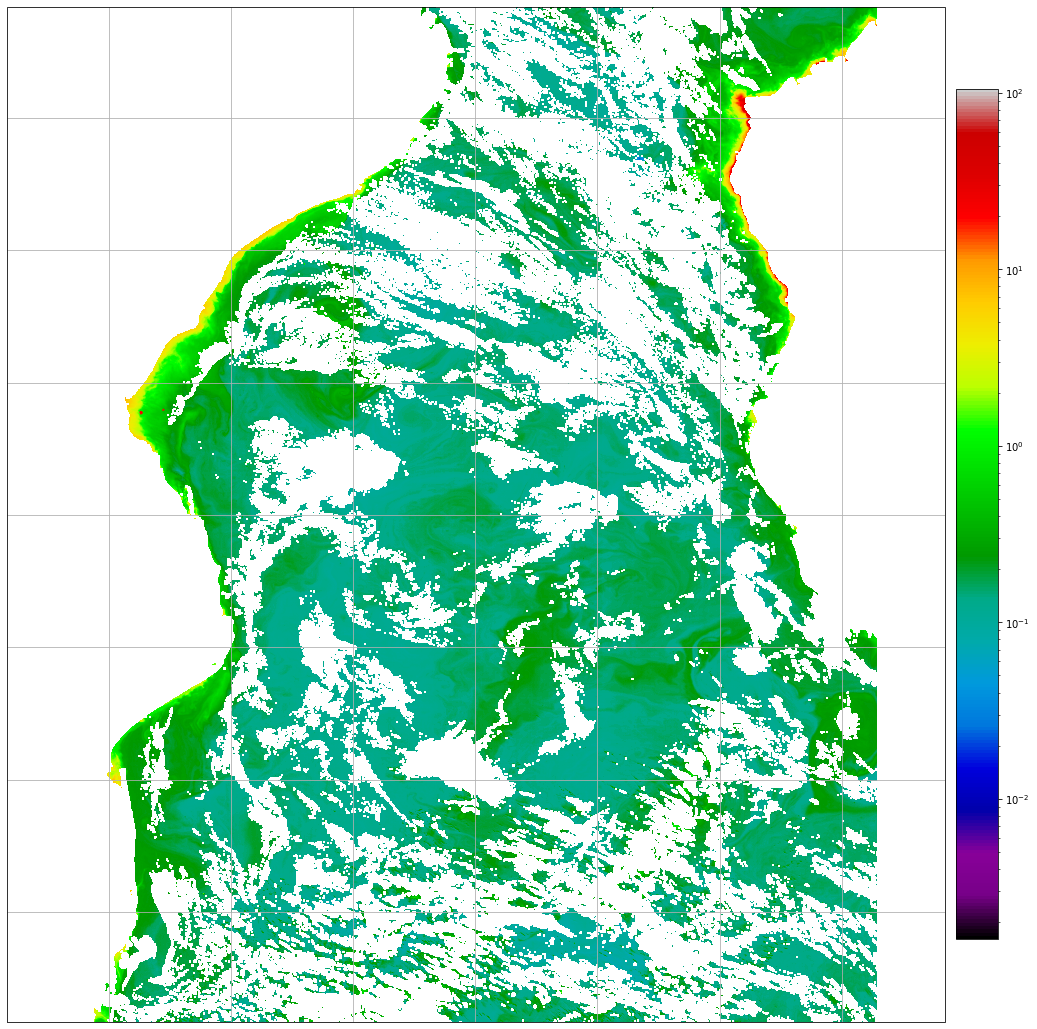

In [6]:
# Define and read data
with h5py.File(files[1], mode='r') as h5:
    lat = util.geometry_data(file=h5, key='Latitude')
    lon = util.geometry_data(file=h5, key='Longitude')
    chl = util.get_data(file=h5, key='CHLA')
    
    fig, ax = util.imview(data=chl, lon=lon, lat=lat, scale='log')

<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
--- 

#### And thank you for your attention! :) 
    Now try the same exercise with other sensors of your chosing.
    We hope you are enjoying the training provided by ECOPs for ECOPs.

# 5. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. https://oceancolor.gsfc.nasa.gov/atbd/ocl2flags/
2. https://global.jaxa.jp/projects/sat/gcom_c/
3. https://github.com/Elgyii/ocean-colour-training-ecops-africa